<a href="https://colab.research.google.com/github/sanjanabayya30/Ai-ml_2303A52019/blob/main/2027_2023_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RANDOM FOREST

MSE: 0.05
MAE: 0.10
R2 Score: 0.99


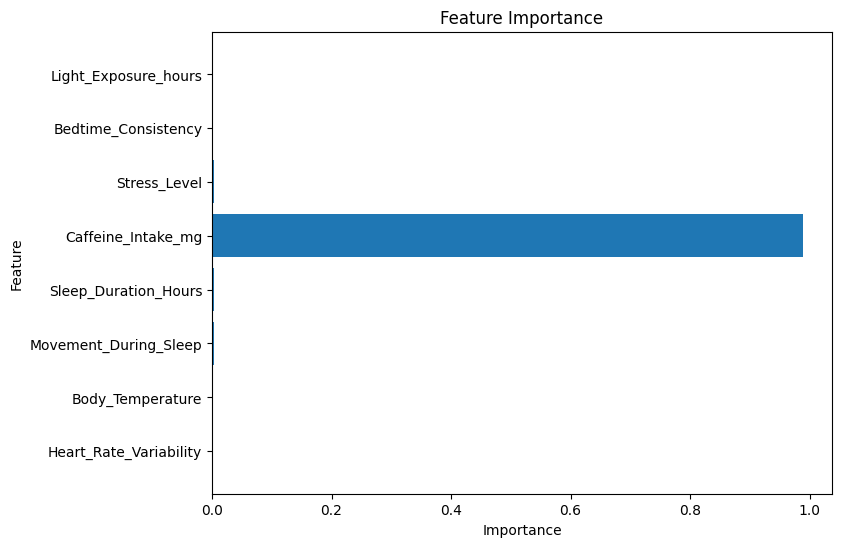

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9891095243536105


In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/drive/MyDrive/archive.zip')

# Drop rows with missing values
df.dropna(inplace=True)

# Define features and target
X = df.drop('Sleep_Quality_Score', axis=1)
y = df['Sleep_Quality_Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2 Score: {r2:.2f}')

# Feature importance
feature_importances = rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')


Accuracy: 0.98
Precision: 0.93
Recall: 0.96
F1-score: 0.95
Confusion Matrix:
[[170   2]
 [  1  27]]


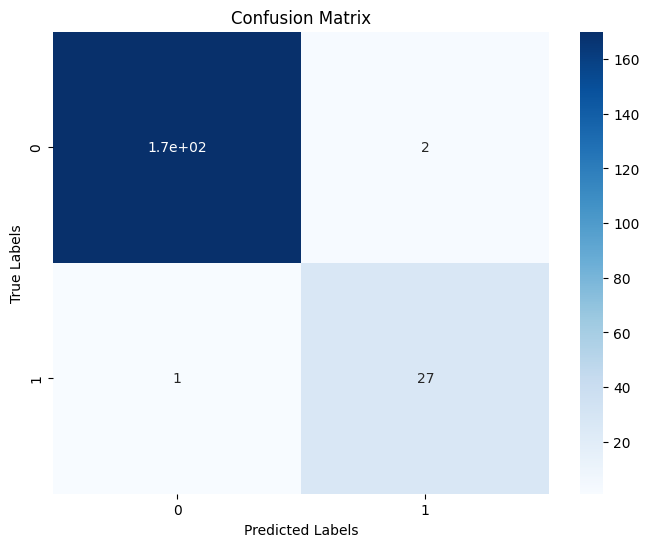

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('/content/drive/MyDrive/archive.zip')

# Convert Sleep Quality Score to binary classification (e.g., good/bad sleep)
df['Sleep_Quality_Score'] = df['Sleep_Quality_Score'].apply(lambda x: 1 if x >= 7 else 0)

# Define features and target
X = df.drop('Sleep_Quality_Score', axis=1)
y = df['Sleep_Quality_Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_mat)

# Plot Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# LOGISTIC REGRESSION

Accuracy: 0.99
Precision: 1.00
Recall: 0.93
F1-score: 0.96
Confusion Matrix:
[[172   0]
 [  2  26]]


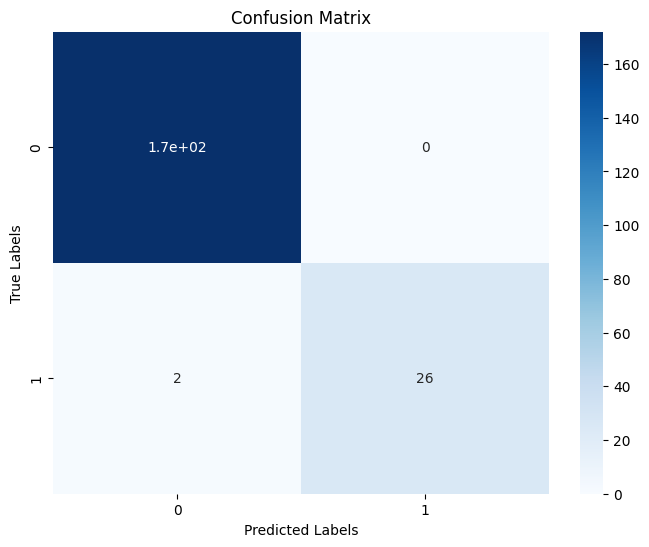

Coefficients:
[[-0.06375708 -0.15642145 -0.28872455  0.21785647 -6.8166139  -0.1192638
   0.02323341  0.2367626 ]]
Intercept:
[-8.21862292]


In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('/content/drive/MyDrive/archive.zip')

# Convert Sleep Quality Score to binary classification (e.g., good/bad sleep)
df['Sleep_Quality_Score'] = df['Sleep_Quality_Score'].apply(lambda x: 1 if x >= 7 else 0)

# Define features and target
X = df.drop('Sleep_Quality_Score', axis=1)
y = df['Sleep_Quality_Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_mat)

# Plot Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Coefficients
print('Coefficients:')
print(lr_model.coef_)

# Intercept
print('Intercept:')
print(lr_model.intercept_)

# KNN CLASSIFICATION

Accuracy: 0.92
Precision: 0.93
Recall: 0.46
F1-score: 0.62
Confusion Matrix:
[[171   1]
 [ 15  13]]


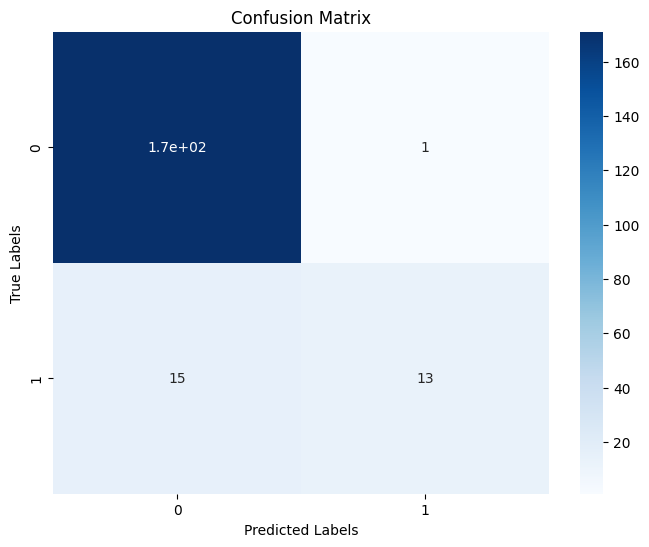

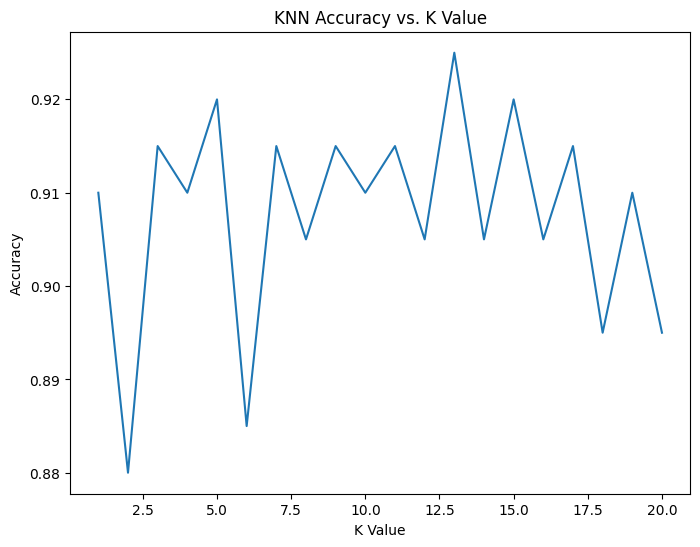

In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/drive/MyDrive/archive.zip')

# Convert Sleep Quality Score to binary classification (e.g., good/bad sleep)
df['Sleep_Quality_Score'] = df['Sleep_Quality_Score'].apply(lambda x: 1 if x >= 7 else 0)

# Define features and target
X = df.drop('Sleep_Quality_Score', axis=1)
y = df['Sleep_Quality_Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn_model.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_mat)

# Plot Confusion Matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Find optimal K value
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    y_pred = knn_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. K Value')
plt.show()

# DECISION TREE

Accuracy: 0.97
Precision: 0.90
Recall: 0.93
F1-score: 0.91
Confusion Matrix:
[[169   3]
 [  2  26]]


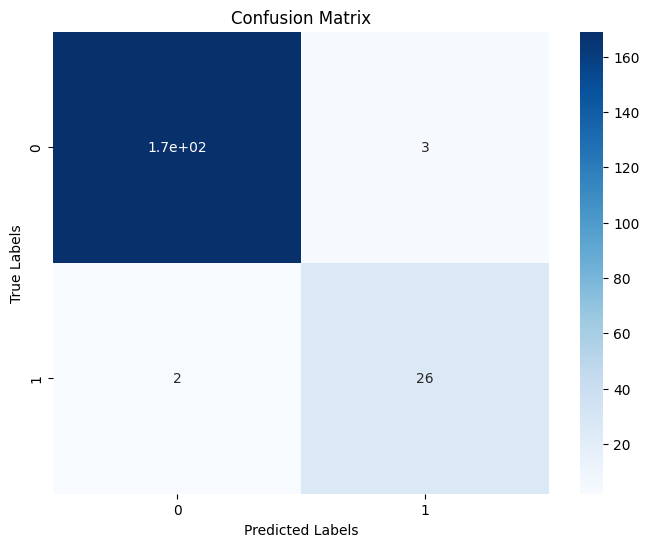

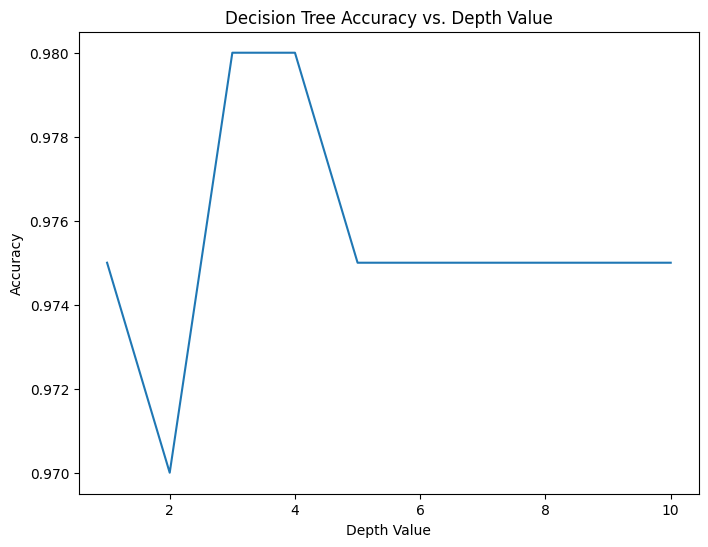

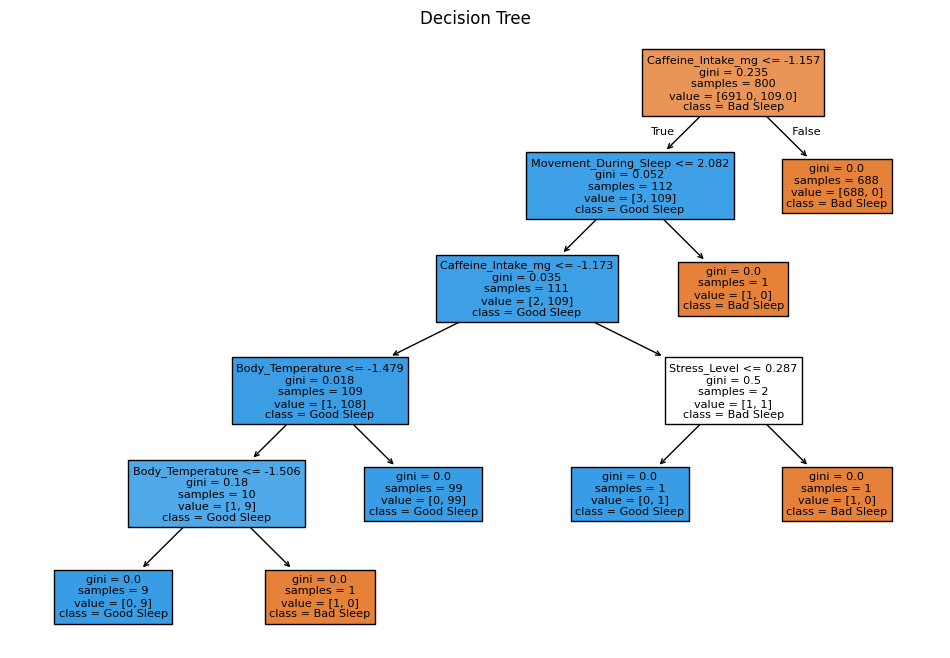

In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('/content/drive/MyDrive/archive.zip')

# Convert Sleep Quality Score to binary classification (e.g., good/bad sleep)
df['Sleep_Quality_Score'] = df['Sleep_Quality_Score'].apply(lambda x: 1 if x >= 7 else 0)

# Define features and target
X = df.drop('Sleep_Quality_Score', axis=1)
y = df['Sleep_Quality_Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = dt_model.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_mat)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Find optimal depth value
depth_values = range(1, 11)
accuracies = []

for depth in depth_values:
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_model.fit(X_train_scaled, y_train)
    y_pred = dt_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(depth_values, accuracies)
plt.xlabel('Depth Value')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Depth Value')
plt.show()

# Visualize Decision Tree
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=['Bad Sleep', 'Good Sleep'], filled=True)
plt.title('Decision Tree')
plt.show()

# SVM

Accuracy: 0.97
Precision: 0.96
Recall: 0.82
F1-score: 0.88
Confusion Matrix:
[[171   1]
 [  5  23]]


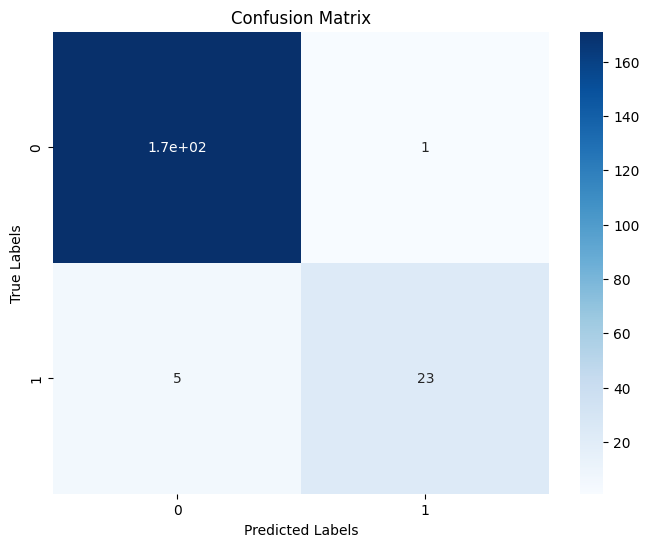

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.99


In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('/content/drive/MyDrive/archive.zip')

# Convert Sleep Quality Score to binary classification (e.g., good/bad sleep)
df['Sleep_Quality_Score'] = df['Sleep_Quality_Score'].apply(lambda x: 1 if x >= 7 else 0)

# Define features and target
X = df.drop('Sleep_Quality_Score', axis=1)
y = df['Sleep_Quality_Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='rbf', C=1, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_mat)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Parameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

# ROC CURVE

Accuracy: 0.97
Precision: 0.96
Recall: 0.82
F1-score: 0.88
Confusion Matrix:
[[171   1]
 [  5  23]]


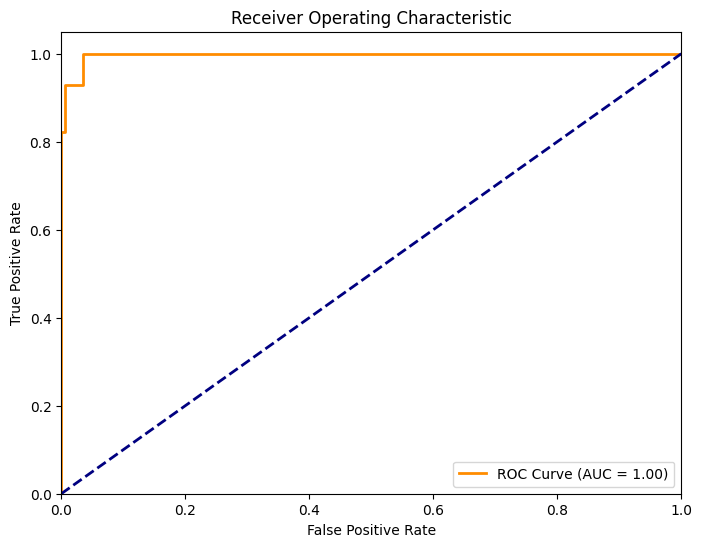

In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/drive/MyDrive/archive.zip')

# Convert Sleep Quality Score to binary classification (e.g., good/bad sleep)
df['Sleep_Quality_Score'] = df['Sleep_Quality_Score'].apply(lambda x: 1 if x >= 7 else 0)

# Define features and target
X = df.drop('Sleep_Quality_Score', axis=1)
y = df['Sleep_Quality_Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='rbf', C=1, probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)
y_pred_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_mat)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# CO-RELATION MATRIX

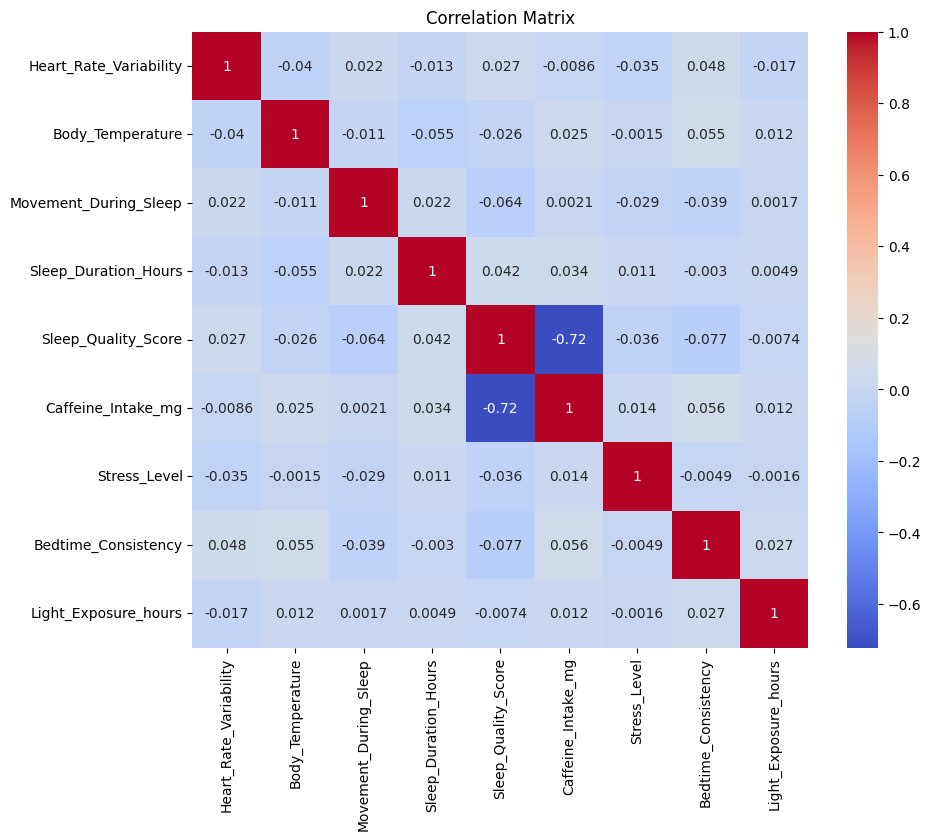

                        Heart_Rate_Variability  Body_Temperature  \
Heart_Rate_Variability                1.000000         -0.040400   
Body_Temperature                     -0.040400          1.000000   
Movement_During_Sleep                 0.022129         -0.011199   
Sleep_Duration_Hours                 -0.013321         -0.054698   
Sleep_Quality_Score                   0.026911         -0.025720   
Caffeine_Intake_mg                   -0.008619          0.024757   
Stress_Level                         -0.035387         -0.001531   
Bedtime_Consistency                   0.048199          0.054962   
Light_Exposure_hours                 -0.016585          0.012436   

                        Movement_During_Sleep  Sleep_Duration_Hours  \
Heart_Rate_Variability               0.022129             -0.013321   
Body_Temperature                    -0.011199             -0.054698   
Movement_During_Sleep                1.000000              0.021586   
Sleep_Duration_Hours               

In [14]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/drive/MyDrive/archive.zip')

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Print correlation matrix
print(corr_matrix)